In [ ]:

!nvcc --version
from google.colab import drive
drive.mount('/content/drive')

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0
Mounted at /content/drive


In [ ]:
!pip install difflogic

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.2 MB/s eta 0:00:00
  Created wheel for difflogic: filename=difflogic-0.1.0-cp311-cp311-linux_x86_64.whl size=2941829 sha256=18799d9d3ac65f1d2c162940536b7b99b837911cfd9b6601c34581ad

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/difflogic-main

/content/drive/MyDrive/Colab Notebooks/difflogic-main


In [ ]:
!pwd

/content/drive/MyDrive/Colab Notebooks/difflogic-main


# New Section

In [ ]:
from difflogic import LogicLayer, GroupSum
import torch
import os

os.chdir('/content/drive/MyDrive/Colab Notebooks/difflogic-main')

model = torch.nn.Sequential(
    torch.nn.Flatten(),
    LogicLayer(784, 16_000),
    LogicLayer(16_000, 16_000),
    LogicLayer(16_000, 16_000),
    LogicLayer(16_000, 16_000),
    LogicLayer(16_000, 16_000),
    GroupSum(k=10, tau=30)
)

In [ ]:
!python '/content/drive/MyDrive/Colab Notebooks/difflogic-main/experiments/main.py'  -eid 526010           -bs 100 -t 20 --dataset adult         -ni 100_000 -ef 1000 -k 256 -l 5 --compile_model

{'experiment_id': 526010, 'dataset': 'adult', 'tau': 20.0, 'seed': 0, 'batch_size': 100, 'learning_rate': 0.01, 'training_bit_count': 32, 'implementation': 'cuda', 'packbits_eval': False, 'compile_model': True, 'num_iterations': 100000, 'eval_freq': 1000, 'valid_set_size': 0.0, 'extensive_eval': False, 'connections': 'unique', 'architecture': 'randomly_connected', 'num_neurons': 256, 'num_layers': 5, 'grad_factor': 1.0}
/content/drive/MyDrive/Colab Notebooks/difflogic-main/experiments/uci_datasets.py:218: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  return torch.tensor(feat).float()
total_num_neurons=1024
total_num_weights=1024
Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): LogicLayer(116, 256, train)
  (2): LogicLayer(256, 256, train)
  (3): LogicLayer(256, 256,

In [ ]:
!python '/content/drive/MyDrive/Colab Notebooks/difflogic-main/experiments/main.py'  -eid 526020 -lr 0.001 -bs 100 -t 20 --dataset breast_cancer -ni 100_000 -ef 1_000 -k 128 -l 5 --compile_model

Traceback (most recent call last):
  File "/content/drive/MyDrive/Colab Notebooks/difflogic-main/experiments/main.py", line 7, in <module>
    import torch
  File "/usr/local/lib/python3.11/dist-packages/torch/__init__.py", line 2016, in <module>
    from torch import _VF as _VF, functional as functional  # usort: skip
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/functional.py", line 7, in <module>
    import torch.nn.functional as F
  File "/usr/local/lib/python3.11/dist-packages/torch/nn/__init__.py", line 8, in <module>
    from torch.nn.modules import *  # usort: skip # noqa: F403
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/nn/modules/__init__.py", line 1, in <module>
    from .module import Module  # usort: skip
    ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py", line 29, in <module>
    from torch.utils._python_di

Statistics for first element:
Mean: 0.503603
Variance: 0.104205
Median: 0.505058


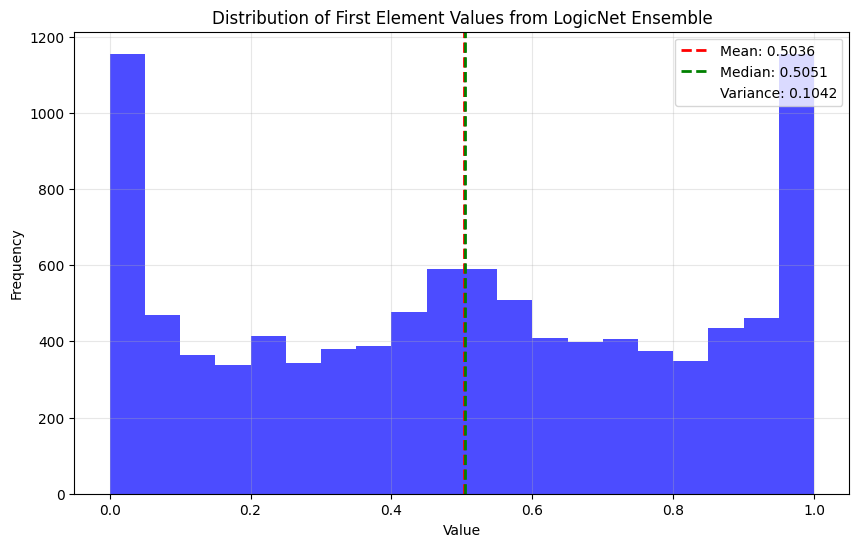

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from typing import Union
import math


# Binary Logic Operations Table
# | id | Operator             | AB=00 | AB=01 | AB=10 | AB=11 |
# |----|----------------------|-------|-------|-------|-------|
# | 0  | 0                    | 0     | 0     | 0     | 0     |
# | 1  | A and B              | 0     | 0     | 0     | 1     |
# | 2  | not(A implies B)     | 0     | 0     | 1     | 0     |
# | 3  | A                    | 0     | 0     | 1     | 1     |
# | 4  | not(B implies A)     | 0     | 1     | 0     | 0     |
# | 5  | B                    | 0     | 1     | 0     | 1     |
# | 6  | A xor B              | 0     | 1     | 1     | 0     |
# | 7  | A or B               | 0     | 1     | 1     | 1     |
# | 8  | not(A or B)          | 1     | 0     | 0     | 0     |
# | 9  | not(A xor B)         | 1     | 0     | 0     | 1     |
# | 10 | not(B)               | 1     | 0     | 1     | 0     |
# | 11 | B implies A          | 1     | 0     | 1     | 1     |
# | 12 | not(A)               | 1     | 1     | 0     | 0     |
# | 13 | A implies B          | 1     | 1     | 0     | 1     |
# | 14 | not(A and B)         | 1     | 1     | 1     | 0     |
# | 15 | 1                    | 1     | 1     | 1     | 1     |

ALL_OPERATIONS = [
    "zero", "and", "not_implies", "a", "not_implied_by", "b", "xor", "or",
    "not_or", "not_xor", "not_b", "implied_by", "not_a", "implies", "not_and", "one"
]


def bin_op(a, b, i):
    """Apply a binary logic operation to inputs a and b"""
    assert a[0].shape == b[0].shape, (a[0].shape, b[0].shape)
    if a.shape[0] > 1:
        assert a[1].shape == b[1].shape, (a[1].shape, b[1].shape)

    if i == 0:
        return torch.zeros_like(a)
    elif i == 1:
        return a * b
    elif i == 2:
        return a - a * b
    elif i == 3:
        return a
    elif i == 4:
        return b - a * b
    elif i == 5:
        return b
    elif i == 6:
        return a + b - 2 * a * b
    elif i == 7:
        return a + b - a * b
    elif i == 8:
        return 1 - (a + b - a * b)
    elif i == 9:
        return 1 - (a + b - 2 * a * b)
    elif i == 10:
        return 1 - b
    elif i == 11:
        return 1 - b + a * b
    elif i == 12:
        return 1 - a
    elif i == 13:
        return 1 - a + a * b
    elif i == 14:
        return 1 - a * b
    elif i == 15:
        return torch.ones_like(a)


def bin_op_s(a, b, i_s):
    """Apply a weighted combination of binary operations"""
    r = torch.zeros_like(a)
    for i in range(16):
        u = bin_op(a, b, i)
        r = r + i_s[..., i] * u
    return r


def get_unique_connections(in_dim, out_dim, device='cuda'):
    """Generate unique connections between inputs and gates"""
    assert out_dim * 2 >= in_dim, 'The number of neurons must not be smaller than half of the inputs'

    x = torch.arange(in_dim).long().unsqueeze(0)

    # Take pairs (0, 1), (2, 3), (4, 5), ...
    a, b = x[..., ::2], x[..., 1::2]
    if a.shape[-1] != b.shape[-1]:
        m = min(a.shape[-1], b.shape[-1])
        a = a[..., :m]
        b = b[..., :m]

    # If this was not enough, take pairs (1, 2), (3, 4), (5, 6), ...
    if a.shape[-1] < out_dim:
        a_, b_ = x[..., 1::2], x[..., 2::2]
        a = torch.cat([a, a_], dim=-1)
        b = torch.cat([b, b_], dim=-1)
        if a.shape[-1] != b.shape[-1]:
            m = min(a.shape[-1], b.shape[-1])
            a = a[..., :m]
            b = b[..., :m]

    # If this was not enough, take pairs with offsets >= 2:
    offset = 2
    while out_dim > a.shape[-1] > offset:
        a_, b_ = x[..., :-offset], x[..., offset:]
        a = torch.cat([a, a_], dim=-1)
        b = torch.cat([b, b_], dim=-1)
        offset += 1
        assert a.shape[-1] == b.shape[-1], (a.shape[-1], b.shape[-1])

    if a.shape[-1] >= out_dim:
        a = a[..., :out_dim]
        b = b[..., :out_dim]
    else:
        assert False, (a.shape[-1], offset, out_dim)

    perm = torch.randperm(out_dim)

    a = a[:, perm].squeeze(0)
    b = b[:, perm].squeeze(0)

    a, b = a.to(torch.int64), b.to(torch.int64)
    a, b = a.to(device), b.to(device)
    a, b = a.contiguous(), b.contiguous()
    return a, b


class GradFactor(torch.autograd.Function):
    """Function to scale gradients during backpropagation"""
    @staticmethod
    def forward(ctx, x, f):
        ctx.f = f
        return x

    @staticmethod
    def backward(ctx, grad_y):
        return grad_y * ctx.f, None


class LogicLayer(nn.Module):
    """
    A differentiable logic gate layer.

    This layer applies binary logic operations to pairs of input features.
    Each logic gate performs one of 16 possible logic operations.
    """
    def __init__(
            self,
            in_dim: int,
            out_dim: int,
            device: str = 'cuda',
            grad_factor: float = 1.,
            connections: str = 'random',
            alpha: float = 1.0  # Added alpha parameter for Dirichlet initialization
    ):
        """
        Initialize a logic layer.

        Args:
            in_dim: Input dimension
            out_dim: Output dimension (number of logic gates)
            device: Device to use ('cuda' or 'cpu')
            grad_factor: Gradient scaling factor
            connections: Connection strategy ('random' or 'unique')
            alpha: Concentration parameter for Dirichlet distribution
        """
        super().__init__()

        # Initialize weights using Dirichlet distribution
        if isinstance(alpha, float):
            alpha_tensor = torch.ones(16) * alpha
        else:
            alpha_tensor = torch.tensor(alpha)
            assert len(alpha_tensor) == 16, "Alpha must have length 16"

        # Generate Dirichlet samples for each output neuron
        weights_list = []
        for _ in range(out_dim):
            # Sample from Dirichlet distribution
            dirichlet_sample = torch.distributions.Dirichlet(alpha_tensor).sample()
            weights_list.append(dirichlet_sample)

        # Stack all samples to form the weights tensor
        weights = torch.stack(weights_list).to(device)

        # Convert to parameter
        self.weights = nn.Parameter(weights)

        self.in_dim = in_dim
        self.out_dim = out_dim
        self.device = device
        self.grad_factor = grad_factor

        self.connections = connections
        assert self.connections in ['random', 'unique'], self.connections
        self.indices = self.get_connections(self.connections, device)

        self.num_neurons = out_dim
        self.num_weights = out_dim

    def forward(self, x):
        """Forward pass of the logic layer"""
        if self.grad_factor != 1.:
            x = GradFactor.apply(x, self.grad_factor)

        return self.forward_python(x)

    def forward_python(self, x):
        """Python implementation of the forward pass"""
        assert x.shape[-1] == self.in_dim, (x.shape[-1], self.in_dim)

        a, b = x[..., self.indices[0]], x[..., self.indices[1]]

        # CHANGE: No softmax applied here, using weights directly
        if self.training:
            # Use weights directly without applying softmax
            x = bin_op_s(a, b, self.weights)
        else:
            # During evaluation, use one-hot encoding for the max weight
            weights = torch.nn.functional.one_hot(self.weights.argmax(-1), 16).to(torch.float32)
            x = bin_op_s(a, b, weights)

        return x

    def extra_repr(self):
        """String representation of the layer"""
        return '{}, {}, {}'.format(self.in_dim, self.out_dim, 'train' if self.training else 'eval')

    def get_connections(self, connections, device='cuda'):
        """Get connection indices for the logic gates"""
        assert self.out_dim * 2 >= self.in_dim, 'The number of neurons must not be smaller than half of the inputs'

        if connections == 'random':
            c = torch.randperm(2 * self.out_dim) % self.in_dim
            c = torch.randperm(self.in_dim)[c]
            c = c.reshape(2, self.out_dim)
            a, b = c[0], c[1]
            a, b = a.to(torch.int64), b.to(torch.int64)
            a, b = a.to(device), b.to(device)
            return a, b
        elif connections == 'unique':
            return get_unique_connections(self.in_dim, self.out_dim, device)
        else:
            raise ValueError(connections)


class GroupSum(nn.Module):
    """
    Group and sum outputs from the logic layer.

    This is typically used as the final layer to aggregate logic gate outputs.
    """
    def __init__(self, k: int, tau: float = 1., device='cuda'):
        """
        Initialize a group sum layer.

        Args:
            k: Number of output groups (typically number of classes)
            tau: Temperature parameter for scaling
            device: Device to use
        """
        super().__init__()
        self.k = k
        self.tau = tau
        self.device = device

    def forward(self, x):
        """Forward pass for grouping and summing"""
        assert x.shape[-1] % self.k == 0, (x.shape, self.k)
        return x.reshape(*x.shape[:-1], self.k, x.shape[-1] // self.k).sum(-1) / self.tau

    def extra_repr(self):
        """String representation of the layer"""
        return 'k={}, tau={}'.format(self.k, self.tau)


# Example of creating and using a DiffLogic model
class LogicNet(nn.Module):
    """Example model using logic layers"""
    def __init__(self, in_features, hidden_sizes, num_classes, device='cuda', alpha=1.0):
        super().__init__()
        self.layers = nn.ModuleList()

        # Input layer
        self.layers.append(LogicLayer(in_features, hidden_sizes[0], device=device, alpha=alpha))

        # Hidden layers
        for i in range(1, len(hidden_sizes)):
            self.layers.append(LogicLayer(hidden_sizes[i-1], hidden_sizes[i], device=device, alpha=alpha))

        # Final layer (assuming last hidden size is a multiple of num_classes)
        # assert hidden_sizes[-1] % num_classes == 0, "Last hidden size must be a multiple of num_classes"
        # self.group_sum = GroupSum(num_classes, device=device)

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x


# Example usage
def example_usage():
    # Parameters
    in_features = 100
    hidden_sizes = [100, 100,100,100,100,100,100,100,100,100,100, 100,100,100,100,100,100,100,100,100]
    num_classes = 3
    batch_size = 1
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

    # Create model with custom alpha for Dirichlet distribution
    # You can use a single value for all operations:
    model = LogicNet(in_features, hidden_sizes, num_classes, device=device, alpha=0.013)

    # Or use different alphas for different operations:
    # alpha_values = [0.1, 0.5, 0.1, 0.5, 0.1, 0.5, 0.1, 0.5, 0.1, 0.5, 0.1, 0.5, 0.1, 0.5, 0.1, 0.5]
    # model = LogicNet(in_features, hidden_sizes, num_classes, device=device, alpha=alpha_values)

    # Create random binary input
    x = torch.randint(0, 2, (batch_size, in_features), device=device).float()

    # Forward pass
    output = model(x)
    # print(f"Output shape: {output.shape}")
    # print(f"Output values: {output}")

    # Check a specific layer's weights
    # print(f"First layer weights shape: {model.layers[0].weights.shape}")
    # print(f"First layer weight distribution (no softmax):")
    # print(model.layers[0].weights[0])  # Show weights for first neuron
    return model, x, output

# Uncomment to run the example

import matplotlib.pyplot as plt
import numpy as np


outputs_array = []
for i in range(100):
  model, x, output = example_usage()
  outputs_array.append(output[0].detach().cpu().numpy())

outputs_array = np.array(outputs_array)
mean_val = np.mean(outputs_array)
variance_val = np.var(outputs_array)
median_val = np.median(outputs_array)

print(f"Statistics for first element:")
print(f"Mean: {mean_val:.6f}")
print(f"Variance: {variance_val:.6f}")
print(f"Median: {median_val:.6f}")



# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(outputs_array.flatten(), bins=20, alpha=0.7, color='blue')
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.4f}')
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.4f}')
plt.axvline(variance_val, color='blue', linestyle='none', linewidth=2, label=f'Variance: {variance_val:.4f}')

plt.title('Distribution of First Element Values from LogicNet Ensemble')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('logicnet_histogram.png')
plt.show()




Epoch [1/10]: Train Loss: 0.6467, Train Acc: 80.21% | Test Loss: 2.4758, Test Acc: 21.48%
Epoch [2/10]: Train Loss: 0.3235, Train Acc: 90.29% | Test Loss: 2.5114, Test Acc: 25.44%
Epoch [3/10]: Train Loss: 0.2849, Train Acc: 91.42% | Test Loss: 2.5180, Test Acc: 21.19%
Epoch [4/10]: Train Loss: 0.2622, Train Acc: 92.20% | Test Loss: 2.4798, Test Acc: 21.41%
Epoch [5/10]: Train Loss: 0.2490, Train Acc: 92.59% | Test Loss: 2.4678, Test Acc: 22.39%
Epoch [6/10]: Train Loss: 0.2380, Train Acc: 92.88% | Test Loss: 2.4597, Test Acc: 22.22%
Epoch [7/10]: Train Loss: 0.2311, Train Acc: 93.05% | Test Loss: 2.4439, Test Acc: 24.32%
Epoch [8/10]: Train Loss: 0.2254, Train Acc: 93.23% | Test Loss: 2.4345, Test Acc: 24.94%
Epoch [9/10]: Train Loss: 0.2218, Train Acc: 93.32% | Test Loss: 2.4170, Test Acc: 28.10%
Epoch [10/10]: Train Loss: 0.2169, Train Acc: 93.42% | Test Loss: 2.4153, Test Acc: 21.72%


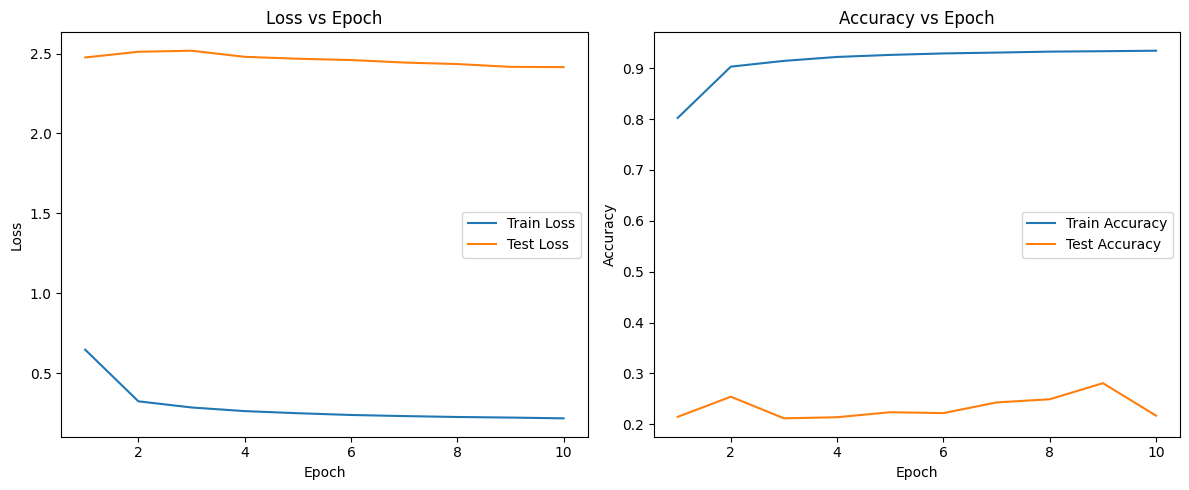

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# ------------------------------
# Your provided LogicNet components
# ------------------------------

def bin_op(a, b, i):
    if i == 0:
        return torch.zeros_like(a)
    elif i == 1:
        return a * b
    elif i == 2:
        return a - a * b
    elif i == 3:
        return a
    elif i == 4:
        return b - a * b
    elif i == 5:
        return b
    elif i == 6:
        return a + b - 2 * a * b
    elif i == 7:
        return a + b - a * b
    elif i == 8:
        return 1 - (a + b - a * b)
    elif i == 9:
        return 1 - (a + b - 2 * a * b)
    elif i == 10:
        return 1 - b
    elif i == 11:
        return 1 - b + a * b
    elif i == 12:
        return 1 - a
    elif i == 13:
        return 1 - a + a * b
    elif i == 14:
        return 1 - a * b
    elif i == 15:
        return torch.ones_like(a)

def bin_op_s(a, b, i_s):
    r = torch.zeros_like(a)
    for i in range(16):
        u = bin_op(a, b, i)
        r = r + i_s[..., i] * u
    return r

def get_unique_connections(in_dim, out_dim, device='cuda'):
    x = torch.arange(in_dim).long().unsqueeze(0)
    a, b = x[..., ::2], x[..., 1::2]
    if a.shape[-1] != b.shape[-1]:
        m = min(a.shape[-1], b.shape[-1])
        a = a[..., :m]
        b = b[..., :m]
    if a.shape[-1] < out_dim:
        a_, b_ = x[..., 1::2], x[..., 2::2]
        a = torch.cat([a, a_], dim=-1)
        b = torch.cat([b, b_], dim=-1)
        if a.shape[-1] != b.shape[-1]:
            m = min(a.shape[-1], b.shape[-1])
            a = a[..., :m]
            b = b[..., :m]
    offset = 2
    while out_dim > a.shape[-1] > offset:
        a_, b_ = x[..., :-offset], x[..., offset:]
        a = torch.cat([a, a_], dim=-1)
        b = torch.cat([b, b_], dim=-1)
        offset += 1
        assert a.shape[-1] == b.shape[-1]
    if a.shape[-1] >= out_dim:
        a = a[..., :out_dim]
        b = b[..., :out_dim]
    else:
        assert False, (a.shape[-1], offset, out_dim)
    perm = torch.randperm(out_dim)
    a = a[:, perm].squeeze(0)
    b = b[:, perm].squeeze(0)
    a, b = a.to(torch.int64), b.to(torch.int64)
    a, b = a.to(device), b.to(device)
    return a, b

class GradFactor(torch.autograd.Function):
    @staticmethod
    def forward(ctx, x, f):
        ctx.f = f
        return x

    @staticmethod
    def backward(ctx, grad_y):
        return grad_y * ctx.f, None

class LogicLayer(nn.Module):
    def __init__(self, in_dim: int, out_dim: int, device: str = 'cuda', grad_factor: float = 1., connections: str = 'random', alpha: float = 1.0):
        super().__init__()
        if isinstance(alpha, float):
            alpha_tensor = torch.ones(16) * alpha
        else:
            alpha_tensor = torch.tensor(alpha)
            assert len(alpha_tensor) == 16, "Alpha must have length 16"
        weights_list = []
        for _ in range(out_dim):
            dirichlet_sample = torch.distributions.Dirichlet(alpha_tensor).sample()
            weights_list.append(dirichlet_sample)
        weights = torch.stack(weights_list).to(device)
        self.weights = nn.Parameter(weights)
        self.in_dim = in_dim
        self.out_dim = out_dim
        self.device = device
        self.grad_factor = grad_factor
        self.connections = connections
        assert self.connections in ['random', 'unique'], self.connections
        self.indices = self.get_connections(self.connections, device)
        self.num_neurons = out_dim

    def forward(self, x):
        if self.grad_factor != 1.:
            x = GradFactor.apply(x, self.grad_factor)
        return self.forward_python(x)

    def forward_python(self, x):
        assert x.shape[-1] == self.in_dim, (x.shape[-1], self.in_dim)
        a, b = x[..., self.indices[0]], x[..., self.indices[1]]
        if self.training:
            x = bin_op_s(a, b, self.weights)
        else:
            weights = torch.nn.functional.one_hot(self.weights.argmax(-1), 16).to(torch.float32)
            x = bin_op_s(a, b, weights)
        return x

    def extra_repr(self):
        return '{}, {}, {}'.format(self.in_dim, self.out_dim, 'train' if self.training else 'eval')

    def get_connections(self, connections, device='cuda'):
        if connections == 'random':
            c = torch.randperm(2 * self.out_dim) % self.in_dim
            c = torch.randperm(self.in_dim)[c]
            c = c.reshape(2, self.out_dim)
            a, b = c[0], c[1]
            a, b = a.to(torch.int64), b.to(torch.int64)
            a, b = a.to(device), b.to(device)
            return a, b
        elif connections == 'unique':
            return get_unique_connections(self.in_dim, self.out_dim, device)
        else:
            raise ValueError(connections)

class LogicNet(nn.Module):
    def __init__(self, in_features, hidden_sizes, device='cuda', alpha=1.0):
        super().__init__()
        self.layers = nn.ModuleList()
        self.layers.append(LogicLayer(in_features, hidden_sizes[0], device=device, alpha=alpha))
        for i in range(1, len(hidden_sizes)):
            self.layers.append(LogicLayer(hidden_sizes[i-1], hidden_sizes[i], device=device, alpha=alpha))

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

# ------------------------------
# New classifier for MNIST
# ------------------------------

class LogicNetClassifier(nn.Module):
    """
    A classifier that uses LogicNet as a feature extractor followed by a linear classification layer.
    """
    def __init__(self, in_features, hidden_sizes, num_classes, device='cuda', alpha=1.0):
        super().__init__()
        self.device = device
        self.feature_extractor = LogicNet(in_features, hidden_sizes, device=device, alpha=alpha)
        # Use a simple linear classifier on top of the extracted features.
        self.classifier = nn.Linear(hidden_sizes[-1], num_classes)

    def forward(self, x):
        # Flatten the MNIST image (28x28 -> 784)
        x = x.view(x.size(0), -1)
        features = self.feature_extractor(x)
        out = self.classifier(features)
        return out

# ------------------------------
# MNIST training and evaluation
# ------------------------------

def train(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    total = 0
    correct = 0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    epoch_loss = running_loss / total
    accuracy = correct / total
    return epoch_loss, accuracy

def evaluate(model, test_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    total = 0
    correct = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
    epoch_loss = running_loss / total
    accuracy = correct / total
    return epoch_loss, accuracy

def main():
    # Hyperparameters
    num_epochs = 10
    batch_size = 512
    learning_rate = 1e-3
    in_features = 28 * 28  # MNIST images are 28x28
    hidden_sizes = [256,256, 128]  # You can experiment with these sizes
    num_classes = 100
    alpha = 0.013  # Dirichlet concentration parameter
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

    # Data transformations and loaders
    transform = transforms.ToTensor()
    train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

    # Initialize the model, loss function, and optimizer
    model = LogicNetClassifier(in_features, hidden_sizes, num_classes, device=device, alpha=alpha).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_losses, train_accuracies = [], []
    test_losses, test_accuracies = [], []

    # Training loop
    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, train_loader, criterion, optimizer, device)
        test_loss, test_acc = evaluate(model, test_loader, criterion, device)

        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        test_losses.append(test_loss)
        test_accuracies.append(test_acc)

        print(f"Epoch [{epoch+1}/{num_epochs}]: "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc*100:.2f}% | "
              f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc*100:.2f}%")

    # Plot training curves
    epochs = np.arange(1, num_epochs+1)
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, test_losses, label='Test Loss')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Loss vs Epoch")

    plt.subplot(1,2,2)
    plt.plot(epochs, train_accuracies, label='Train Accuracy')
    plt.plot(epochs, test_accuracies, label='Test Accuracy')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Accuracy vs Epoch")
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    main()

Running alpha search experiment on cuda...
Testing alphas: [0.001   0.00091 0.00082 0.00073 0.00064 0.00055 0.00046 0.00037 0.00028
 0.00019 0.0001 ]
Testing widths: [512]
Models per configuration: 30
Number of layers: 20

Testing width: 512


Testing alphas for width 512:   9%|▉         | 1/11 [00:33<05:36, 33.65s/it]

  Alpha 0.001000: variance ratio=0.803108 ± 0.757858, time=33.65s


Testing alphas for width 512:  18%|█▊        | 2/11 [01:07<05:01, 33.51s/it]

  Alpha 0.000910: variance ratio=1.371315 ± 2.847304, time=33.42s


Testing alphas for width 512:  27%|██▋       | 3/11 [01:40<04:27, 33.41s/it]

  Alpha 0.000820: variance ratio=0.421339 ± 0.249441, time=33.28s


Testing alphas for width 512:  36%|███▋      | 4/11 [02:13<03:52, 33.28s/it]

  Alpha 0.000730: variance ratio=0.754937 ± 0.718249, time=33.08s


Testing alphas for width 512:  45%|████▌     | 5/11 [02:46<03:19, 33.18s/it]

  Alpha 0.000640: variance ratio=0.726960 ± 0.887668, time=32.99s


Testing alphas for width 512:  55%|█████▍    | 6/11 [03:19<02:45, 33.16s/it]

  Alpha 0.000550: variance ratio=0.700684 ± 0.897392, time=33.12s


Testing alphas for width 512:  64%|██████▎   | 7/11 [03:52<02:11, 32.96s/it]

  Alpha 0.000460: variance ratio=0.822190 ± 0.635312, time=32.55s


Testing alphas for width 512:  73%|███████▎  | 8/11 [04:25<01:39, 33.05s/it]

  Alpha 0.000370: variance ratio=2.502456 ± 3.019118, time=33.23s


Testing alphas for width 512:  82%|████████▏ | 9/11 [04:57<01:05, 32.81s/it]

  Alpha 0.000280: variance ratio=27.034172 ± 21.967682, time=32.28s


Testing alphas for width 512:  91%|█████████ | 10/11 [05:30<00:32, 32.92s/it]

  Alpha 0.000190: variance ratio=1610.982317 ± 1957.515680, time=33.17s


Testing alphas for width 512: 100%|██████████| 11/11 [06:03<00:00, 33.00s/it]

  Alpha 0.000100: variance ratio=179437886575.317963 ± 682865097548.939941, time=32.27s


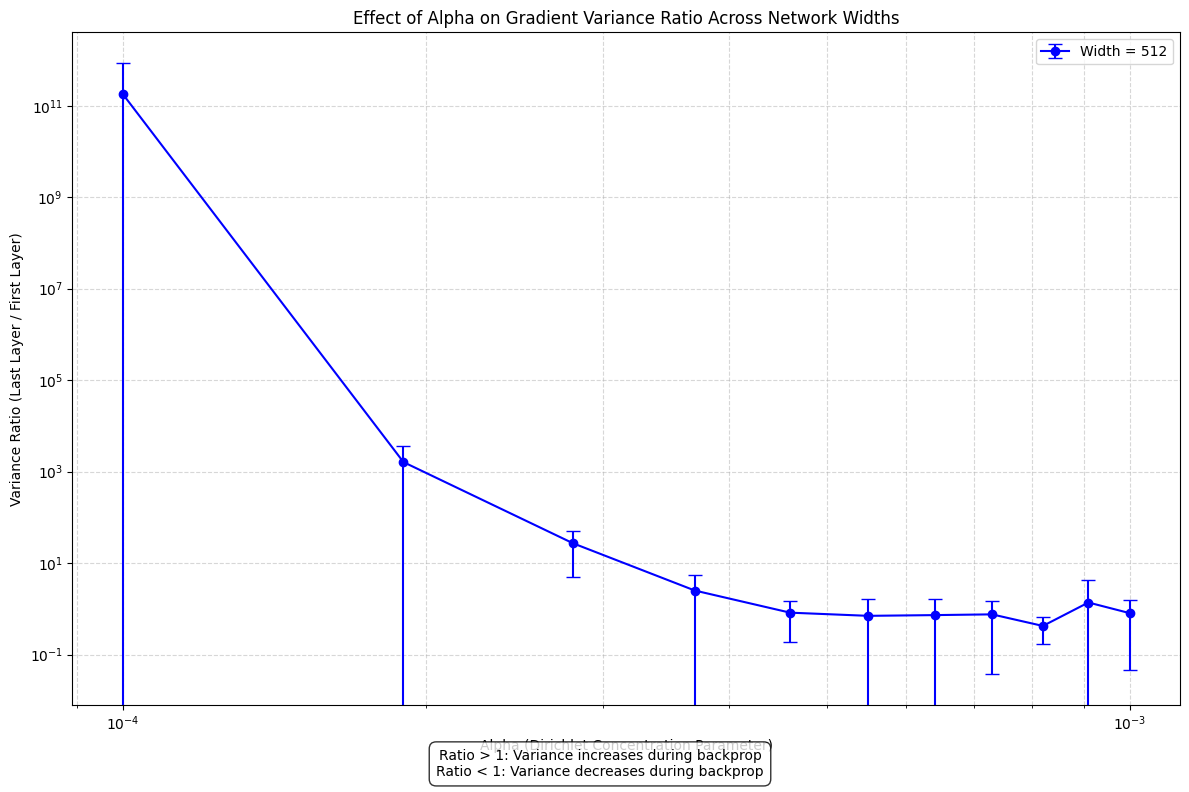

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from typing import Union
import math
import time
from tqdm import tqdm


# Binary Logic Operations Table and core functions
def bin_op(a, b, i):
    """Apply a binary logic operation to inputs a and b"""
    assert a[0].shape == b[0].shape, (a[0].shape, b[0].shape)
    if a.shape[0] > 1:
        assert a[1].shape == b[1].shape, (a[1].shape, b[1].shape)

    if i == 0:
        return torch.zeros_like(a)
    elif i == 1:
        return a * b
    elif i == 2:
        return a - a * b
    elif i == 3:
        return a
    elif i == 4:
        return b - a * b
    elif i == 5:
        return b
    elif i == 6:
        return a + b - 2 * a * b
    elif i == 7:
        return a + b - a * b
    elif i == 8:
        return 1 - (a + b - a * b)
    elif i == 9:
        return 1 - (a + b - 2 * a * b)
    elif i == 10:
        return 1 - b
    elif i == 11:
        return 1 - b + a * b
    elif i == 12:
        return 1 - a
    elif i == 13:
        return 1 - a + a * b
    elif i == 14:
        return 1 - a * b
    elif i == 15:
        return torch.ones_like(a)


def bin_op_s(a, b, i_s):
    """Apply a weighted combination of binary operations"""
    r = torch.zeros_like(a)
    for i in range(16):
        u = bin_op(a, b, i)
        r = r + i_s[..., i] * u
    return r


def get_unique_connections(in_dim, out_dim, device='cuda'):
    """Generate unique connections between inputs and gates"""
    # Handle small output dimensions
    if out_dim * 2 < in_dim:
        a_indices = torch.randint(0, in_dim, (out_dim,), device=device)
        b_indices = torch.randint(0, in_dim, (out_dim,), device=device)

        # Try to make a and b different for each gate
        for i in range(out_dim):
            while a_indices[i] == b_indices[i]:
                b_indices[i] = torch.randint(0, in_dim, (1,), device=device)

        a, b = a_indices, b_indices
    else:
        # Original implementation for larger out_dim
        x = torch.arange(in_dim).long().unsqueeze(0)

        # Take pairs (0, 1), (2, 3), (4, 5), ...
        a, b = x[..., ::2], x[..., 1::2]
        if a.shape[-1] != b.shape[-1]:
            m = min(a.shape[-1], b.shape[-1])
            a = a[..., :m]
            b = b[..., :m]

        # If this was not enough, take pairs (1, 2), (3, 4), (5, 6), ...
        if a.shape[-1] < out_dim:
            a_, b_ = x[..., 1::2], x[..., 2::2]
            a = torch.cat([a, a_], dim=-1)
            b = torch.cat([b, b_], dim=-1)
            if a.shape[-1] != b.shape[-1]:
                m = min(a.shape[-1], b.shape[-1])
                a = a[..., :m]
                b = b[..., :m]

        # If this was not enough, take pairs with offsets >= 2:
        offset = 2
        while out_dim > a.shape[-1] > offset:
            a_, b_ = x[..., :-offset], x[..., offset:]
            a = torch.cat([a, a_], dim=-1)
            b = torch.cat([b, b_], dim=-1)
            offset += 1
            assert a.shape[-1] == b.shape[-1], (a.shape[-1], b.shape[-1])

        if a.shape[-1] >= out_dim:
            a = a[..., :out_dim]
            b = b[..., :out_dim]
        else:
            # Fall back to random connections
            a_indices = torch.randint(0, in_dim, (out_dim,), device=device)
            b_indices = torch.randint(0, in_dim, (out_dim,), device=device)
            a, b = a_indices, b_indices

        perm = torch.randperm(out_dim)
        a = a[:, perm].squeeze(0) if a.dim() > 1 else a
        b = b[:, perm].squeeze(0) if b.dim() > 1 else b

    a, b = a.to(torch.int64), b.to(torch.int64)
    a, b = a.to(device), b.to(device)
    a, b = a.contiguous(), b.contiguous()
    return a, b


class GradFactor(torch.autograd.Function):
    """Function to scale gradients during backpropagation"""
    @staticmethod
    def forward(ctx, x, f):
        ctx.f = f
        return x

    @staticmethod
    def backward(ctx, grad_y):
        return grad_y * ctx.f, None


class LogicLayer(nn.Module):
    """
    A differentiable logic gate layer.
    """
    def __init__(
            self,
            in_dim: int,
            out_dim: int,
            device: str = 'cuda',
            grad_factor: float = 1.,
            connections: str = 'random',
            alpha: float = 1.0,
            layer_idx: int = 0  # Added layer index for identification
    ):
        super().__init__()

        # Store layer index
        self.layer_idx = layer_idx

        # Initialize weights using Dirichlet distribution
        if isinstance(alpha, float):
            alpha_tensor = torch.ones(16) * alpha
        else:
            alpha_tensor = torch.tensor(alpha)
            assert len(alpha_tensor) == 16, "Alpha must have length 16"

        # Generate Dirichlet samples for each output neuron
        weights_list = []
        for _ in range(out_dim):
            dirichlet_sample = torch.distributions.Dirichlet(alpha_tensor).sample()
            weights_list.append(dirichlet_sample)

        # Stack all samples to form the weights tensor
        weights = torch.stack(weights_list).to(device)

        # Convert to parameter
        self.weights = nn.Parameter(weights)

        self.in_dim = in_dim
        self.out_dim = out_dim
        self.device = device
        self.grad_factor = grad_factor

        self.connections = connections
        assert self.connections in ['random', 'unique'], self.connections
        self.indices = self.get_connections(self.connections, device)

        self.num_neurons = out_dim
        self.num_weights = out_dim

        # Initialize gradient storage
        self.gradients = None

    def _save_gradient(self, grad):
        """Hook function to save gradients during backpropagation"""
        self.gradients = grad.clone()

    def forward(self, x):
        """Forward pass of the logic layer"""
        if self.grad_factor != 1.:
            x = GradFactor.apply(x, self.grad_factor)

        output = self.forward_python(x)

        # Register hook to save gradients during backward pass
        if self.training:
            output.register_hook(self._save_gradient)

        return output

    def forward_python(self, x):
        """Python implementation of the forward pass"""
        assert x.shape[-1] == self.in_dim, (x.shape[-1], self.in_dim)

        a, b = x[..., self.indices[0]], x[..., self.indices[1]]

        # Using weights directly without applying softmax
        if self.training:
            x = bin_op_s(a, b, self.weights)
        else:
            weights = torch.nn.functional.one_hot(self.weights.argmax(-1), 16).to(torch.float32)
            x = bin_op_s(a, b, weights)

        return x

    def get_connections(self, connections, device='cuda'):
        """Get connection indices for the logic gates"""
        # Allow any size of out_dim
        if connections == 'random':
            # For random connections, each gate randomly selects two inputs
            a = torch.randint(0, self.in_dim, (self.out_dim,), device=device)
            b = torch.randint(0, self.in_dim, (self.out_dim,), device=device)

            # Try to make a and b different for each gate
            for i in range(self.out_dim):
                if a[i] == b[i]:
                    b[i] = (a[i] + 1) % self.in_dim

            return a, b
        elif connections == 'unique':
            return get_unique_connections(self.in_dim, self.out_dim, device)
        else:
            raise ValueError(connections)


class LogicNet(nn.Module):
    """Example model using logic layers"""
    def __init__(self, in_features, hidden_sizes, device='cuda', alpha=0.013):
        super().__init__()
        self.layers = nn.ModuleList()

        # Input layer (layer_idx=0)
        self.layers.append(LogicLayer(in_features, hidden_sizes[0], device=device, alpha=alpha, layer_idx=0))

        # Hidden layers
        for i in range(1, len(hidden_sizes)):
            self.layers.append(LogicLayer(hidden_sizes[i-1], hidden_sizes[i], device=device, alpha=alpha, layer_idx=i))

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x


def analyze_single_alpha(in_features, width, num_layers, alpha, num_models=12, device='cuda'):
    """
    Analyze models with a specific alpha value.

    Args:
        in_features: Number of input features
        width: Width of each hidden layer
        num_layers: Number of hidden layers
        alpha: Dirichlet concentration parameter
        num_models: Number of models to average over
        device: Device to run on

    Returns:
        Dict containing variance ratio statistics
    """
    # Create uniform width hidden sizes
    hidden_sizes = [width] * num_layers

    # Create fixed input
    fixed_input = torch.randint(0, 2, (1, in_features), device=device).float()

    # Create a target (zeros)
    target = torch.zeros(1, hidden_sizes[-1], device=device)

    # Loss function
    criterion = nn.MSELoss()

    # Storage for results
    variance_ratios = []

    # Run models
    for _ in range(num_models):
        # Create a new model
        model = LogicNet(in_features, hidden_sizes, device=device, alpha=alpha)

        # Set to training mode
        model.train()

        # Create a new input tensor with gradients enabled
        x = fixed_input.clone().requires_grad_(True)

        # Forward pass
        output = model(x)

        # Compute loss
        loss = criterion(output, target)

        # Backward pass
        loss.backward()

        # Get statistics
        first_layer = model.layers[0]
        last_layer = model.layers[-1]

        if first_layer.gradients is not None and last_layer.gradients is not None:
            # Calculate variances
            first_layer_var = float(torch.var(first_layer.gradients).item())
            last_layer_var = float(torch.var(last_layer.gradients).item())

            # Calculate ratio
            if first_layer_var > 0:  # Avoid division by zero
                ratio = last_layer_var / first_layer_var
                variance_ratios.append(ratio)

        # Free memory
        del model, x, output
        torch.cuda.empty_cache() if device == 'cuda' else None

    # Calculate average ratio
    if variance_ratios:
        avg_ratio = np.mean(variance_ratios)
        std_ratio = np.std(variance_ratios)
    else:
        avg_ratio = float('nan')
        std_ratio = float('nan')

    result = {
        'alpha': alpha,
        'avg_variance_ratio': avg_ratio,
        'std_variance_ratio': std_ratio,
        'all_ratios': variance_ratios
    }

    return result


def alpha_search_experiment(alphas, widths, in_features=100, num_layers=20, num_models=12):
    """
    Perform alpha search experiment across multiple alpha values and widths.

    Args:
        alphas: List of alpha values to test
        widths: List of widths to test
        in_features: Number of input features
        num_layers: Number of layers
        num_models: Number of models per configuration

    Returns:
        Nested dictionary of results, indexed by width and alpha
    """
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    results = {}

    print(f"Running alpha search experiment on {device}...")
    print(f"Testing alphas: {alphas}")
    print(f"Testing widths: {widths}")
    print(f"Models per configuration: {num_models}")
    print(f"Number of layers: {num_layers}")

    for width in widths:
        width_results = []
        print(f"\nTesting width: {width}")

        for alpha in tqdm(alphas, desc=f"Testing alphas for width {width}"):
            start_time = time.time()
            result = analyze_single_alpha(
                in_features=in_features,
                width=width,
                num_layers=num_layers,
                alpha=alpha,
                num_models=num_models,
                device=device
            )
            elapsed = time.time() - start_time
            print(f"  Alpha {alpha:.6f}: variance ratio={result['avg_variance_ratio']:.6f} ± {result['std_variance_ratio']:.6f}, time={elapsed:.2f}s")
            width_results.append(result)

        results[width] = width_results

    return results


def plot_alpha_search_results(results):
    """
    Plot the results of the alpha search experiment.

    Args:
        results: Nested dictionary of results, indexed by width and alpha
    """
    # Create figure
    plt.figure(figsize=(12, 8))

    # Color map for different widths
    colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

    # Plot each width's results
    for i, (width, width_results) in enumerate(results.items()):
        color = colors[i % len(colors)]

        # Extract data
        alphas = [r['alpha'] for r in width_results]
        ratios = [r['avg_variance_ratio'] for r in width_results]
        std_devs = [r['std_variance_ratio'] for r in width_results]

        # Plot with error bars
        plt.errorbar(
            alphas, ratios, yerr=std_devs,
            fmt='o-', color=color,
            capsize=5, capthick=1,
            label=f'Width = {width}'
        )

    # Format plot
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Alpha (Dirichlet Concentration Parameter)')
    plt.ylabel('Variance Ratio (Last Layer / First Layer)')
    plt.title('Effect of Alpha on Gradient Variance Ratio Across Network Widths')
    plt.grid(True, which='both', linestyle='--', alpha=0.5)
    plt.legend()

    # Add explanatory text
    plt.annotate(
        'Ratio > 1: Variance increases during backprop\nRatio < 1: Variance decreases during backprop',
        xy=(0.5, 0.02), xycoords='figure fraction',
        ha='center', fontsize=10,
        bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8)
    )

    # Save and show
    plt.tight_layout()
    plt.savefig('logicnet_alpha_search.png', dpi=300)
    plt.show()

    # Save results to a file
    np.save('logicnet_alpha_search_results.npy', results)


if __name__ == "__main__":
    # Define alphas to test (from larger to smaller)
    alphas = np.linspace(0.001, 0.0001, 11)

    # Define widths to test
    widths = [512]

    # Run alpha search experiment
    results = alpha_search_experiment(
        alphas=alphas,
        widths=widths,
        in_features=100,  # Fixed input size
        num_layers=20,    # Use 20 layers as requested
        num_models=30     # Average over 12 models for each configuration
    )

    # Plot results
    plot_alpha_search_results(results)

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


def analytical_dirichlet_moments(alpha_vector):
    """
    Calculate the analytical mean and variance for the Dirichlet distribution.

    Args:
        alpha_vector: Vector of concentration parameters

    Returns:
        Dictionary with analytical means and variances
    """
    alpha_0 = sum(alpha_vector)

    # Analytical mean: E[X_i] = alpha_i / alpha_0
    means = [alpha_i / alpha_0 for alpha_i in alpha_vector]

    # Analytical variance: Var[X_i] = (alpha_i * (alpha_0 - alpha_i)) / (alpha_0^2 * (alpha_0 + 1))
    variances = [
        (alpha_i * (alpha_0 - alpha_i)) / (alpha_0**2 * (alpha_0 + 1))
        for alpha_i in alpha_vector
    ]

    # Analytical covariance: Cov[X_i, X_j] = -alpha_i * alpha_j / (alpha_0^2 * (alpha_0 + 1))
    covariances = []
    for i, alpha_i in enumerate(alpha_vector):
        for j, alpha_j in enumerate(alpha_vector):
            if i < j:
                cov = -alpha_i * alpha_j / (alpha_0**2 * (alpha_0 + 1))
                covariances.append((i, j, cov))

    return {
        'means': means,
        'variances': variances,
        'covariances': covariances
    }


def test_dirichlet_distribution(alpha_value, dim=16, num_samples=100000, device='cuda'):
    """
    Test PyTorch's Dirichlet distribution for a specific alpha value.

    Args:
        alpha_value: Single alpha value to use for all dimensions
        dim: Dimensionality of the distribution
        num_samples: Number of samples to generate
        device: Device to use for computations

    Returns:
        Dictionary with results
    """
    # Create concentration vector
    alpha_tensor = torch.ones(dim, device=device) * alpha_value

    # Create Dirichlet distribution
    dirichlet = torch.distributions.Dirichlet(alpha_tensor)

    # Generate samples
    print(f"Generating {num_samples} samples from Dirichlet({alpha_value})")
    samples = dirichlet.sample((num_samples,))

    # Move to CPU for numpy calculations
    samples_np = samples.cpu().numpy()

    # Calculate empirical statistics
    empirical_means = np.mean(samples_np, axis=0)
    empirical_variances = np.var(samples_np, axis=0)

    # Calculate analytical statistics
    alpha_vector = [alpha_value] * dim
    analytical = analytical_dirichlet_moments(alpha_vector)

    # Calculate discrepancies
    mean_discrepancies = empirical_means - np.array(analytical['means'])
    variance_discrepancies = empirical_variances - np.array(analytical['variances'])

    # Average absolute discrepancies
    avg_mean_discrepancy = np.mean(np.abs(mean_discrepancies))
    avg_variance_discrepancy = np.mean(np.abs(variance_discrepancies))

    return {
        'alpha': alpha_value,
        'dim': dim,
        'num_samples': num_samples,
        'analytical_means': analytical['means'],
        'analytical_variances': analytical['variances'],
        'empirical_means': empirical_means,
        'empirical_variances': empirical_variances,
        'mean_discrepancies': mean_discrepancies,
        'variance_discrepancies': variance_discrepancies,
        'avg_mean_discrepancy': avg_mean_discrepancy,
        'avg_variance_discrepancy': avg_variance_discrepancy,
        'samples': samples_np
    }


def run_dirichlet_tests(alphas=[0.01, 0.005, 0.001, 0.0005], dim=16, num_samples=100000):
    """
    Run tests for multiple alpha values.

    Args:
        alphas: List of alpha values to test
        dim: Dimensionality of distributions
        num_samples: Number of samples per test
    """
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f"Running Dirichlet distribution tests on {device}")

    all_results = {}

    for alpha in alphas:
        print(f"\nTesting alpha = {alpha}")
        results = test_dirichlet_distribution(alpha, dim, num_samples, device)

        print(f"Results for alpha = {alpha}:")
        print(f"  Average Mean Discrepancy: {results['avg_mean_discrepancy']:.6f}")
        print(f"  Average Variance Discrepancy: {results['avg_variance_discrepancy']:.6f}")
        print(f"  Avg Analytical Mean: {np.mean(results['analytical_means']):.6f}")
        print(f"  Avg Empirical Mean: {np.mean(results['empirical_means']):.6f}")
        print(f"  Avg Analytical Variance: {np.mean(results['analytical_variances']):.6f}")
        print(f"  Avg Empirical Variance: {np.mean(results['empirical_variances']):.6f}")

    return all_results


if __name__ == "__main__":
    # Define alpha values to test (focusing on small values)
    alphas = [0.005, 0.002, 0.001]

    # Run tests
    all_results = run_dirichlet_tests(alphas=alphas, dim=16, num_samples=100000)

Running Dirichlet distribution tests on cuda

Testing alpha = 0.005
Generating 100000 samples from Dirichlet(0.005)
Results for alpha = 0.005:
  Average Mean Discrepancy: 0.000535
  Average Variance Discrepancy: 0.000408
  Avg Analytical Mean: 0.062500
  Avg Empirical Mean: 0.062500
  Avg Analytical Variance: 0.054253
  Avg Empirical Variance: 0.054190

Testing alpha = 0.002
Generating 100000 samples from Dirichlet(0.002)
Results for alpha = 0.002:
  Average Mean Discrepancy: 0.000502
  Average Variance Discrepancy: 0.003957
  Avg Analytical Mean: 0.062500
  Avg Empirical Mean: 0.062500
  Avg Analytical Variance: 0.056777
  Avg Empirical Variance: 0.052820

Testing alpha = 0.001
Generating 100000 samples from Dirichlet(0.001)
Results for alpha = 0.001:
  Average Mean Discrepancy: 0.000569
  Average Variance Discrepancy: 0.015276
  Avg Analytical Mean: 0.062500
  Avg Empirical Mean: 0.062500
  Avg Analytical Variance: 0.057671
  Avg Empirical Variance: 0.042395



Testing initialization method: dirichlet
  Running model 1/10
  Running model 2/10
  Running model 3/10
  Running model 4/10
  Running model 5/10
  Running model 6/10
  Running model 7/10
  Running model 8/10
  Running model 9/10
  Running model 10/10
  Results for dirichlet:
    Average variance ratio: 1561128.338173 ± 2029655.083593
    Average first layer variance: 0.000000
    Average last layer variance: 0.000001

Testing initialization method: simplex_corners
  Running model 1/10
  Running model 2/10
  Running model 3/10
  Running model 4/10
  Running model 5/10
  Running model 6/10
  Running model 7/10
  Running model 8/10
  Running model 9/10
  Running model 10/10
  Results for simplex_corners:
    Average variance ratio: 0.316368 ± 0.795001
    Average first layer variance: 0.000162
    Average last layer variance: 0.000001


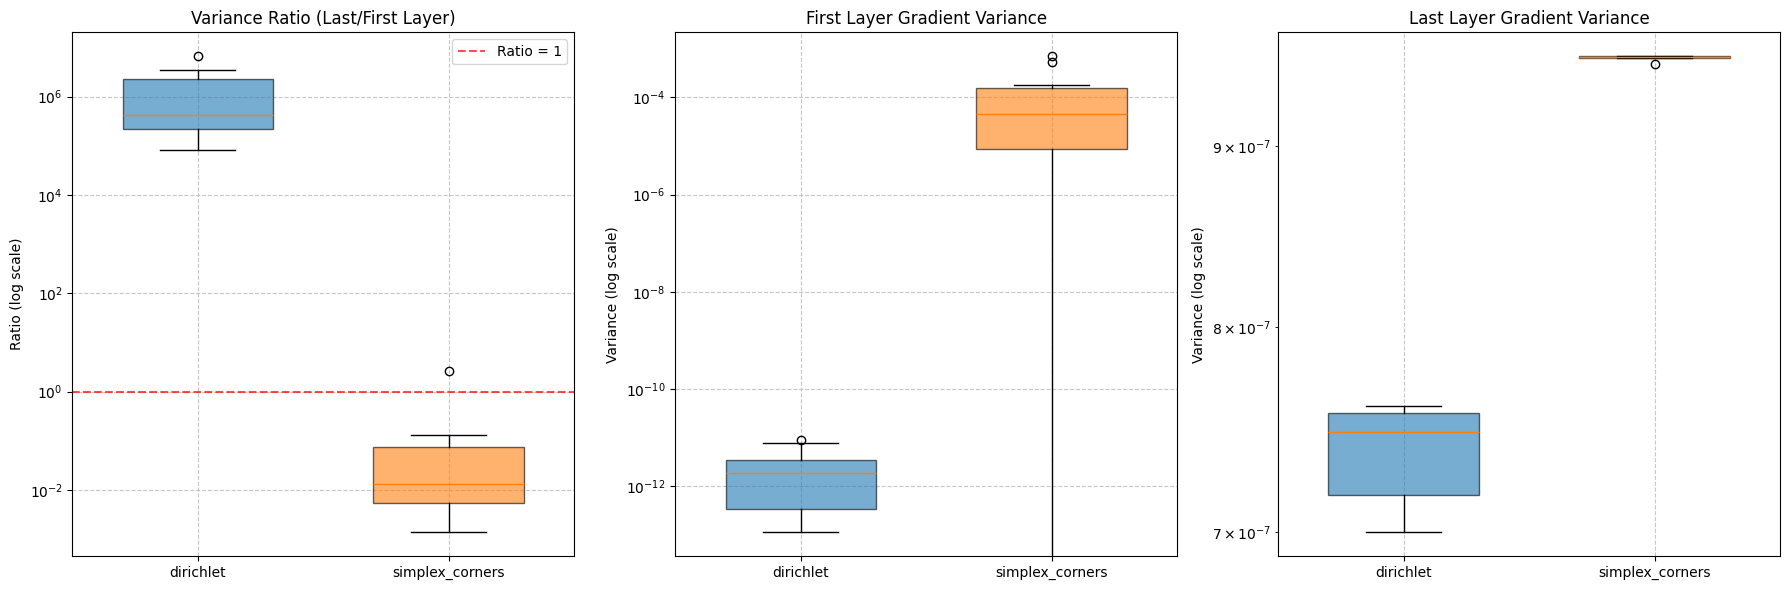

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from typing import Union
import math
import time
from tqdm import tqdm


# Binary Logic Operations Table and core functions
def bin_op(a, b, i):
    """Apply a binary logic operation to inputs a and b"""
    assert a[0].shape == b[0].shape, (a[0].shape, b[0].shape)
    if a.shape[0] > 1:
        assert a[1].shape == b[1].shape, (a[1].shape, b[1].shape)

    if i == 0:
        return torch.zeros_like(a)
    elif i == 1:
        return a * b
    elif i == 2:
        return a - a * b
    elif i == 3:
        return a
    elif i == 4:
        return b - a * b
    elif i == 5:
        return b
    elif i == 6:
        return a + b - 2 * a * b
    elif i == 7:
        return a + b - a * b
    elif i == 8:
        return 1 - (a + b - a * b)
    elif i == 9:
        return 1 - (a + b - 2 * a * b)
    elif i == 10:
        return 1 - b
    elif i == 11:
        return 1 - b + a * b
    elif i == 12:
        return 1 - a
    elif i == 13:
        return 1 - a + a * b
    elif i == 14:
        return 1 - a * b
    elif i == 15:
        return torch.ones_like(a)


def bin_op_s(a, b, i_s):
    """Apply a weighted combination of binary operations"""
    r = torch.zeros_like(a)
    for i in range(16):
        u = bin_op(a, b, i)
        r = r + i_s[..., i] * u
    return r


def get_unique_connections(in_dim, out_dim, device='cuda'):
    """Generate unique connections between inputs and gates"""
    # Handle small output dimensions
    if out_dim * 2 < in_dim:
        a_indices = torch.randint(0, in_dim, (out_dim,), device=device)
        b_indices = torch.randint(0, in_dim, (out_dim,), device=device)

        # Try to make a and b different for each gate
        for i in range(out_dim):
            while a_indices[i] == b_indices[i]:
                b_indices[i] = torch.randint(0, in_dim, (1,), device=device)

        a, b = a_indices, b_indices
    else:
        # Original implementation for larger out_dim
        x = torch.arange(in_dim).long().unsqueeze(0)

        # Take pairs (0, 1), (2, 3), (4, 5), ...
        a, b = x[..., ::2], x[..., 1::2]
        if a.shape[-1] != b.shape[-1]:
            m = min(a.shape[-1], b.shape[-1])
            a = a[..., :m]
            b = b[..., :m]

        # If this was not enough, take pairs (1, 2), (3, 4), (5, 6), ...
        if a.shape[-1] < out_dim:
            a_, b_ = x[..., 1::2], x[..., 2::2]
            a = torch.cat([a, a_], dim=-1)
            b = torch.cat([b, b_], dim=-1)
            if a.shape[-1] != b.shape[-1]:
                m = min(a.shape[-1], b.shape[-1])
                a = a[..., :m]
                b = b[..., :m]

        # If this was not enough, take pairs with offsets >= 2:
        offset = 2
        while out_dim > a.shape[-1] > offset:
            a_, b_ = x[..., :-offset], x[..., offset:]
            a = torch.cat([a, a_], dim=-1)
            b = torch.cat([b, b_], dim=-1)
            offset += 1
            assert a.shape[-1] == b.shape[-1], (a.shape[-1], b.shape[-1])

        if a.shape[-1] >= out_dim:
            a = a[..., :out_dim]
            b = b[..., :out_dim]
        else:
            # Fall back to random connections
            a_indices = torch.randint(0, in_dim, (out_dim,), device=device)
            b_indices = torch.randint(0, in_dim, (out_dim,), device=device)
            a, b = a_indices, b_indices

        perm = torch.randperm(out_dim)
        a = a[:, perm].squeeze(0) if a.dim() > 1 else a
        b = b[:, perm].squeeze(0) if b.dim() > 1 else b

    a, b = a.to(torch.int64), b.to(torch.int64)
    a, b = a.to(device), b.to(device)
    a, b = a.contiguous(), b.contiguous()
    return a, b


class GradFactor(torch.autograd.Function):
    """Function to scale gradients during backpropagation"""
    @staticmethod
    def forward(ctx, x, f):
        ctx.f = f
        return x

    @staticmethod
    def backward(ctx, grad_y):
        return grad_y * ctx.f, None


class LogicLayer(nn.Module):
    """
    A differentiable logic gate layer.
    """
    def __init__(
            self,
            in_dim: int,
            out_dim: int,
            device: str = 'cuda',
            grad_factor: float = 1.,
            connections: str = 'random',
            initialization: str = 'dirichlet',  # Added initialization method parameter
            alpha: float = 1.0,
            layer_idx: int = 0
    ):
        super().__init__()

        # Store layer index
        self.layer_idx = layer_idx

        # Initialize weights
        if initialization == 'dirichlet':
            # Initialize weights using Dirichlet distribution
            if isinstance(alpha, float):
                alpha_tensor = torch.ones(16) * alpha
            else:
                alpha_tensor = torch.tensor(alpha)
                assert len(alpha_tensor) == 16, "Alpha must have length 16"

            # Generate Dirichlet samples for each output neuron
            weights_list = []
            for _ in range(out_dim):
                dirichlet_sample = torch.distributions.Dirichlet(alpha_tensor).sample()
                weights_list.append(dirichlet_sample)

            # Stack all samples to form the weights tensor
            weights = torch.stack(weights_list).to(device)

        elif initialization == 'simplex_corners':
            # Initialize weights using corners of the 16-dimensional simplex (one-hot vectors)
            # Each corner represents exactly one logic operation
            weights = torch.zeros(out_dim, 16, device=device)

            # Randomly assign one of the 16 corners to each neuron
            corner_indices = torch.randint(0, 16, (out_dim,), device=device)

            # Set the chosen corner to 1 for each neuron (one-hot encoding)
            for i in range(out_dim):
                weights[i, corner_indices[i]] = 1.0

        else:
            raise ValueError(f"Unknown initialization method: {initialization}")

        # Convert to parameter
        self.weights = nn.Parameter(weights)

        self.in_dim = in_dim
        self.out_dim = out_dim
        self.device = device
        self.grad_factor = grad_factor
        self.initialization = initialization

        self.connections = connections
        assert self.connections in ['random', 'unique'], self.connections
        self.indices = self.get_connections(self.connections, device)

        self.num_neurons = out_dim
        self.num_weights = out_dim

        # Initialize gradient storage
        self.gradients = None

    def _save_gradient(self, grad):
        """Hook function to save gradients during backpropagation"""
        self.gradients = grad.clone()

    def forward(self, x):
        """Forward pass of the logic layer"""
        if self.grad_factor != 1.:
            x = GradFactor.apply(x, self.grad_factor)

        output = self.forward_python(x)

        # Register hook to save gradients during backward pass
        if self.training:
            output.register_hook(self._save_gradient)

        return output

    def forward_python(self, x):
        """Python implementation of the forward pass"""
        assert x.shape[-1] == self.in_dim, (x.shape[-1], self.in_dim)

        a, b = x[..., self.indices[0]], x[..., self.indices[1]]

        # Using weights directly without applying softmax
        if self.training:
            x = bin_op_s(a, b, self.weights)
        else:
            weights = torch.nn.functional.one_hot(self.weights.argmax(-1), 16).to(torch.float32)
            x = bin_op_s(a, b, weights)

        return x

    def get_connections(self, connections, device='cuda'):
        """Get connection indices for the logic gates"""
        # Allow any size of out_dim
        if connections == 'random':
            # For random connections, each gate randomly selects two inputs
            a = torch.randint(0, self.in_dim, (self.out_dim,), device=device)
            b = torch.randint(0, self.in_dim, (self.out_dim,), device=device)

            # Try to make a and b different for each gate
            for i in range(self.out_dim):
                if a[i] == b[i]:
                    b[i] = (a[i] + 1) % self.in_dim

            return a, b
        elif connections == 'unique':
            return get_unique_connections(self.in_dim, self.out_dim, device)
        else:
            raise ValueError(connections)


class LogicNet(nn.Module):
    """Example model using logic layers"""
    def __init__(self, in_features, hidden_sizes, device='cuda', initialization='dirichlet', alpha=0.013):
        super().__init__()
        self.layers = nn.ModuleList()

        # Input layer (layer_idx=0)
        self.layers.append(LogicLayer(in_features, hidden_sizes[0], device=device,
                                     initialization=initialization, alpha=alpha, layer_idx=0))

        # Hidden layers
        for i in range(1, len(hidden_sizes)):
            self.layers.append(LogicLayer(hidden_sizes[i-1], hidden_sizes[i], device=device,
                                         initialization=initialization, alpha=alpha, layer_idx=i))

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x


def analyze_initialization_impact(in_features, width, num_layers, initializations, num_models=12, device='cuda'):
    """
    Analyze the impact of different initialization methods.

    Args:
        in_features: Number of input features
        width: Width of each hidden layer
        num_layers: Number of hidden layers
        initializations: List of initialization methods to test
        num_models: Number of models to average over
        device: Device to run on

    Returns:
        Dict containing variance ratio statistics for each initialization
    """
    # Create uniform width hidden sizes
    hidden_sizes = [width] * num_layers

    # Create fixed input
    fixed_input = torch.randint(0, 2, (1, in_features), device=device).float()

    # Create a target (zeros)
    target = torch.zeros(1, hidden_sizes[-1], device=device)

    # Loss function
    criterion = nn.MSELoss()

    # Results for each initialization method
    all_results = {}

    for init_method in initializations:
        print(f"\nTesting initialization method: {init_method}")

        # Storage for results
        variance_ratios = []
        first_layer_vars = []
        last_layer_vars = []

        # Run models
        for m in range(num_models):
            print(f"  Running model {m+1}/{num_models}")

            # Create a new model
            alpha_value = 0.001 if init_method == 'dirichlet' else None
            model = LogicNet(in_features, hidden_sizes, device=device,
                           initialization=init_method, alpha=alpha_value)

            # Set to training mode
            model.train()

            # Create a new input tensor with gradients enabled
            x = fixed_input.clone().requires_grad_(True)

            # Forward pass
            output = model(x)

            # Compute loss
            loss = criterion(output, target)

            # Backward pass
            loss.backward()

            # Get statistics
            first_layer = model.layers[0]
            last_layer = model.layers[-1]

            if first_layer.gradients is not None and last_layer.gradients is not None:
                # Calculate variances
                first_layer_var = float(torch.var(first_layer.gradients).item())
                last_layer_var = float(torch.var(last_layer.gradients).item())

                first_layer_vars.append(first_layer_var)
                last_layer_vars.append(last_layer_var)

                # Calculate ratio
                if first_layer_var > 0:  # Avoid division by zero
                    ratio = last_layer_var / first_layer_var
                    variance_ratios.append(ratio)

            # Free memory
            del model, x, output
            torch.cuda.empty_cache() if device == 'cuda' else None

        # Calculate average ratio
        if variance_ratios:
            avg_ratio = np.mean(variance_ratios)
            std_ratio = np.std(variance_ratios)
            avg_first_var = np.mean(first_layer_vars)
            avg_last_var = np.mean(last_layer_vars)
        else:
            avg_ratio = float('nan')
            std_ratio = float('nan')
            avg_first_var = float('nan')
            avg_last_var = float('nan')

        result = {
            'initialization': init_method,
            'avg_variance_ratio': avg_ratio,
            'std_variance_ratio': std_ratio,
            'avg_first_layer_var': avg_first_var,
            'avg_last_layer_var': avg_last_var,
            'all_ratios': variance_ratios,
            'first_layer_vars': first_layer_vars,
            'last_layer_vars': last_layer_vars
        }

        all_results[init_method] = result

        print(f"  Results for {init_method}:")
        print(f"    Average variance ratio: {avg_ratio:.6f} ± {std_ratio:.6f}")
        print(f"    Average first layer variance: {avg_first_var:.6f}")
        print(f"    Average last layer variance: {avg_last_var:.6f}")

    return all_results


def plot_initialization_comparison(results):
    """
    Plot a comparison of different initialization methods.

    Args:
        results: Dictionary with results for different initialization methods
    """
    # Create figure
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Extract data for each initialization method
    methods = list(results.keys())

    # 1. Plot variance ratios
    ax = axes[0]
    for method in methods:
        data = results[method]['all_ratios']
        ax.boxplot(data, positions=[methods.index(method)],
                 widths=0.6, patch_artist=True,
                 boxprops=dict(facecolor=f'C{methods.index(method)}', alpha=0.6))
    ax.set_yscale('log')
    ax.set_title('Variance Ratio (Last/First Layer)')
    ax.set_xticks(range(len(methods)))
    ax.set_xticklabels(methods)
    ax.set_ylabel('Ratio (log scale)')
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.axhline(1.0, color='red', linestyle='--', alpha=0.7, label='Ratio = 1')
    ax.legend()

    # 2. Plot first layer variances
    ax = axes[1]
    for method in methods:
        data = results[method]['first_layer_vars']
        ax.boxplot(data, positions=[methods.index(method)],
                 widths=0.6, patch_artist=True,
                 boxprops=dict(facecolor=f'C{methods.index(method)}', alpha=0.6))
    ax.set_yscale('log')
    ax.set_title('First Layer Gradient Variance')
    ax.set_xticks(range(len(methods)))
    ax.set_xticklabels(methods)
    ax.set_ylabel('Variance (log scale)')
    ax.grid(True, linestyle='--', alpha=0.7)

    # 3. Plot last layer variances
    ax = axes[2]
    for method in methods:
        data = results[method]['last_layer_vars']
        ax.boxplot(data, positions=[methods.index(method)],
                 widths=0.6, patch_artist=True,
                 boxprops=dict(facecolor=f'C{methods.index(method)}', alpha=0.6))
    ax.set_yscale('log')
    ax.set_title('Last Layer Gradient Variance')
    ax.set_xticks(range(len(methods)))
    ax.set_xticklabels(methods)
    ax.set_ylabel('Variance (log scale)')
    ax.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.savefig('logicnet_initialization_comparison.png', dpi=300)
    plt.show()

    # Save results to a file
    np.save('logicnet_initialization_results.npy', results)


if __name__ == "__main__":
    # Test configurations
    initializations = ['dirichlet', 'simplex_corners']
    width = 1024
    num_layers = 100
    in_features = 100
    num_models = 10

    # Run initialization comparison
    results = analyze_initialization_impact(
        in_features=in_features,
        width=width,
        num_layers=num_layers,
        initializations=initializations,
        num_models=num_models
    )

    # Plot results
    plot_initialization_comparison(results)


Testing initialization method: dirichlet
  Running model 1/10
  Running model 2/10
  Running model 3/10
  Running model 4/10
  Running model 5/10
  Running model 6/10
  Running model 7/10
  Running model 8/10
  Running model 9/10
  Running model 10/10
  Results for dirichlet:
    Average variance ratio: 52.850265 ± 87.658883
    Average first layer variance: 0.000000
    Average last layer variance: 0.000003

Testing initialization method: simplex_corners
  Running model 1/10
  Running model 2/10
  Running model 3/10
  Running model 4/10
  Running model 5/10
  Running model 6/10
  Running model 7/10
  Running model 8/10
  Running model 9/10
  Running model 10/10
  Results for simplex_corners:
    Average variance ratio: 0.972903 ± 2.237408
    Average first layer variance: 0.000097
    Average last layer variance: 0.000004


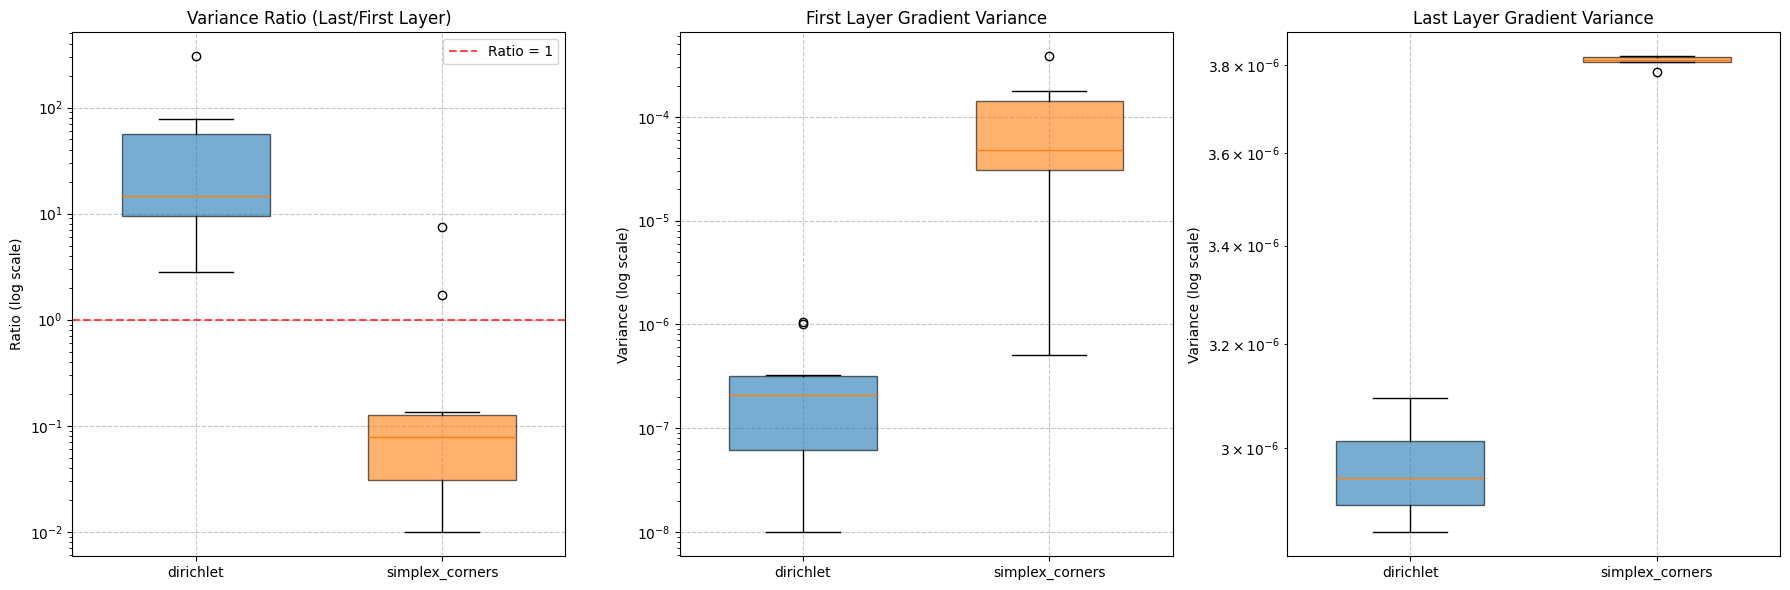

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from typing import Union
import math
import time
from tqdm import tqdm


# Binary Logic Operations Table and core functions
def bin_op(a, b, i):
    """Apply a binary logic operation to inputs a and b"""
    assert a[0].shape == b[0].shape, (a[0].shape, b[0].shape)
    if a.shape[0] > 1:
        assert a[1].shape == b[1].shape, (a[1].shape, b[1].shape)

    if i == 0:
        return torch.zeros_like(a)
    elif i == 1:
        return a * b
    elif i == 2:
        return a - a * b
    elif i == 3:
        return a
    elif i == 4:
        return b - a * b
    elif i == 5:
        return b
    elif i == 6:
        return a + b - 2 * a * b
    elif i == 7:
        return a + b - a * b
    elif i == 8:
        return 1 - (a + b - a * b)
    elif i == 9:
        return 1 - (a + b - 2 * a * b)
    elif i == 10:
        return 1 - b
    elif i == 11:
        return 1 - b + a * b
    elif i == 12:
        return 1 - a
    elif i == 13:
        return 1 - a + a * b
    elif i == 14:
        return 1 - a * b
    elif i == 15:
        return torch.ones_like(a)


def bin_op_s(a, b, i_s):
    """Apply a weighted combination of binary operations"""
    r = torch.zeros_like(a)
    for i in range(16):
        u = bin_op(a, b, i)
        r = r + i_s[..., i] * u
    return r


def get_unique_connections(in_dim, out_dim, device='cuda'):
    """Generate unique connections between inputs and gates"""
    # Handle small output dimensions
    if out_dim * 2 < in_dim:
        a_indices = torch.randint(0, in_dim, (out_dim,), device=device)
        b_indices = torch.randint(0, in_dim, (out_dim,), device=device)

        # Try to make a and b different for each gate
        for i in range(out_dim):
            while a_indices[i] == b_indices[i]:
                b_indices[i] = torch.randint(0, in_dim, (1,), device=device)

        a, b = a_indices, b_indices
    else:
        # Original implementation for larger out_dim
        x = torch.arange(in_dim).long().unsqueeze(0)

        # Take pairs (0, 1), (2, 3), (4, 5), ...
        a, b = x[..., ::2], x[..., 1::2]
        if a.shape[-1] != b.shape[-1]:
            m = min(a.shape[-1], b.shape[-1])
            a = a[..., :m]
            b = b[..., :m]

        # If this was not enough, take pairs (1, 2), (3, 4), (5, 6), ...
        if a.shape[-1] < out_dim:
            a_, b_ = x[..., 1::2], x[..., 2::2]
            a = torch.cat([a, a_], dim=-1)
            b = torch.cat([b, b_], dim=-1)
            if a.shape[-1] != b.shape[-1]:
                m = min(a.shape[-1], b.shape[-1])
                a = a[..., :m]
                b = b[..., :m]

        # If this was not enough, take pairs with offsets >= 2:
        offset = 2
        while out_dim > a.shape[-1] > offset:
            a_, b_ = x[..., :-offset], x[..., offset:]
            a = torch.cat([a, a_], dim=-1)
            b = torch.cat([b, b_], dim=-1)
            offset += 1
            assert a.shape[-1] == b.shape[-1], (a.shape[-1], b.shape[-1])

        if a.shape[-1] >= out_dim:
            a = a[..., :out_dim]
            b = b[..., :out_dim]
        else:
            # Fall back to random connections
            a_indices = torch.randint(0, in_dim, (out_dim,), device=device)
            b_indices = torch.randint(0, in_dim, (out_dim,), device=device)
            a, b = a_indices, b_indices

        perm = torch.randperm(out_dim)
        a = a[:, perm].squeeze(0) if a.dim() > 1 else a
        b = b[:, perm].squeeze(0) if b.dim() > 1 else b

    a, b = a.to(torch.int64), b.to(torch.int64)
    a, b = a.to(device), b.to(device)
    a, b = a.contiguous(), b.contiguous()
    return a, b


class GradFactor(torch.autograd.Function):
    """Function to scale gradients during backpropagation"""
    @staticmethod
    def forward(ctx, x, f):
        ctx.f = f
        return x

    @staticmethod
    def backward(ctx, grad_y):
        return grad_y * ctx.f, None


class LogicLayer(nn.Module):
    """
    A differentiable logic gate layer.
    """
    def __init__(
            self,
            in_dim: int,
            out_dim: int,
            device: str = 'cuda',
            grad_factor: float = 1.,
            connections: str = 'random',
            initialization: str = 'dirichlet',  # Added initialization method parameter
            alpha: float = 1.0,
            layer_idx: int = 0
    ):
        super().__init__()

        # Store layer index
        self.layer_idx = layer_idx

        # Initialize weights
        if initialization == 'dirichlet':
            # Initialize weights using Dirichlet distribution
            if isinstance(alpha, float):
                alpha_tensor = torch.ones(16) * alpha
            else:
                alpha_tensor = torch.tensor(alpha)
                assert len(alpha_tensor) == 16, "Alpha must have length 16"

            # Generate Dirichlet samples for each output neuron
            weights_list = []
            for _ in range(out_dim):
                dirichlet_sample = torch.distributions.Dirichlet(alpha_tensor).sample()
                weights_list.append(dirichlet_sample)

            # Stack all samples to form the weights tensor
            weights = torch.stack(weights_list).to(device)

        elif initialization == 'simplex_corners':
            # Initialize weights using corners of the 16-dimensional simplex (one-hot vectors)
            # Each corner represents exactly one logic operation
            weights = torch.zeros(out_dim, 16, device=device)

            # Randomly assign one of the 16 corners to each neuron
            corner_indices = torch.randint(0, 16, (out_dim,), device=device)

            # Set the chosen corner to 1 for each neuron (one-hot encoding)
            for i in range(out_dim):
                weights[i, corner_indices[i]] = 1.0

        else:
            raise ValueError(f"Unknown initialization method: {initialization}")

        # Convert to parameter
        self.weights = nn.Parameter(weights)

        self.in_dim = in_dim
        self.out_dim = out_dim
        self.device = device
        self.grad_factor = grad_factor
        self.initialization = initialization

        self.connections = connections
        assert self.connections in ['random', 'unique'], self.connections
        self.indices = self.get_connections(self.connections, device)

        self.num_neurons = out_dim
        self.num_weights = out_dim

        # Initialize gradient storage
        self.gradients = None

    def _save_gradient(self, grad):
        """Hook function to save gradients during backpropagation"""
        self.gradients = grad.clone()

    def forward(self, x):
        """Forward pass of the logic layer"""
        if self.grad_factor != 1.:
            x = GradFactor.apply(x, self.grad_factor)

        output = self.forward_python(x)

        # Register hook to save gradients during backward pass
        if self.training:
            output.register_hook(self._save_gradient)

        return output

    def forward_python(self, x):
        """Python implementation of the forward pass"""
        assert x.shape[-1] == self.in_dim, (x.shape[-1], self.in_dim)

        a, b = x[..., self.indices[0]], x[..., self.indices[1]]

        # Using weights directly without applying softmax
        if self.training:
            x = bin_op_s(a, b, self.weights)
        else:
            weights = torch.nn.functional.one_hot(self.weights.argmax(-1), 16).to(torch.float32)
            x = bin_op_s(a, b, weights)

        return x

    def get_connections(self, connections, device='cuda'):
        """Get connection indices for the logic gates"""
        # Allow any size of out_dim
        if connections == 'random':
            # For random connections, each gate randomly selects two inputs
            a = torch.randint(0, self.in_dim, (self.out_dim,), device=device)
            b = torch.randint(0, self.in_dim, (self.out_dim,), device=device)

            # Try to make a and b different for each gate
            for i in range(self.out_dim):
                if a[i] == b[i]:
                    b[i] = (a[i] + 1) % self.in_dim

            return a, b
        elif connections == 'unique':
            return get_unique_connections(self.in_dim, self.out_dim, device)
        else:
            raise ValueError(connections)


class LogicNet(nn.Module):
    """Example model using logic layers"""
    def __init__(self, in_features, hidden_sizes, device='cuda', initialization='dirichlet', alpha=0.013):
        super().__init__()
        self.layers = nn.ModuleList()

        # Input layer (layer_idx=0)
        self.layers.append(LogicLayer(in_features, hidden_sizes[0], device=device,
                                     initialization=initialization, alpha=alpha, layer_idx=0))

        # Hidden layers
        for i in range(1, len(hidden_sizes)):
            self.layers.append(LogicLayer(hidden_sizes[i-1], hidden_sizes[i], device=device,
                                         initialization=initialization, alpha=alpha, layer_idx=i))

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x


def analyze_initialization_impact(in_features, width, num_layers, initializations, num_models=12, device='cuda'):
    """
    Analyze the impact of different initialization methods.

    Args:
        in_features: Number of input features
        width: Width of each hidden layer
        num_layers: Number of hidden layers
        initializations: List of initialization methods to test
        num_models: Number of models to average over
        device: Device to run on

    Returns:
        Dict containing variance ratio statistics for each initialization
    """
    # Create uniform width hidden sizes
    hidden_sizes = [width] * num_layers

    # Create fixed input
    fixed_input = torch.randint(0, 2, (1, in_features), device=device).float()

    # Create a target (zeros)
    target = torch.zeros(1, hidden_sizes[-1], device=device)

    # Loss function
    criterion = nn.MSELoss()

    # Results for each initialization method
    all_results = {}

    for init_method in initializations:
        print(f"\nTesting initialization method: {init_method}")

        # Storage for results
        variance_ratios = []
        first_layer_vars = []
        last_layer_vars = []

        # Run models
        for m in range(num_models):
            print(f"  Running model {m+1}/{num_models}")

            # Create a new model
            alpha_value = 0.001 if init_method == 'dirichlet' else None
            model = LogicNet(in_features, hidden_sizes, device=device,
                           initialization=init_method, alpha=alpha_value)

            # Set to training mode
            model.train()

            # Create a new input tensor with gradients enabled
            x = fixed_input.clone().requires_grad_(True)

            # Forward pass
            output = model(x)

            # Compute loss
            loss = criterion(output, target)

            # Backward pass
            loss.backward()

            # Get statistics
            first_layer = model.layers[0]
            last_layer = model.layers[-1]

            if first_layer.gradients is not None and last_layer.gradients is not None:
                # Calculate variances
                first_layer_var = float(torch.var(first_layer.gradients).item())
                last_layer_var = float(torch.var(last_layer.gradients).item())

                first_layer_vars.append(first_layer_var)
                last_layer_vars.append(last_layer_var)

                # Calculate ratio
                if first_layer_var > 0:  # Avoid division by zero
                    ratio = last_layer_var / first_layer_var
                    variance_ratios.append(ratio)

            # Free memory
            del model, x, output
            torch.cuda.empty_cache() if device == 'cuda' else None

        # Calculate average ratio
        if variance_ratios:
            avg_ratio = np.mean(variance_ratios)
            std_ratio = np.std(variance_ratios)
            avg_first_var = np.mean(first_layer_vars)
            avg_last_var = np.mean(last_layer_vars)
        else:
            avg_ratio = float('nan')
            std_ratio = float('nan')
            avg_first_var = float('nan')
            avg_last_var = float('nan')

        result = {
            'initialization': init_method,
            'avg_variance_ratio': avg_ratio,
            'std_variance_ratio': std_ratio,
            'avg_first_layer_var': avg_first_var,
            'avg_last_layer_var': avg_last_var,
            'all_ratios': variance_ratios,
            'first_layer_vars': first_layer_vars,
            'last_layer_vars': last_layer_vars
        }

        all_results[init_method] = result

        print(f"  Results for {init_method}:")
        print(f"    Average variance ratio: {avg_ratio:.6f} ± {std_ratio:.6f}")
        print(f"    Average first layer variance: {avg_first_var:.6f}")
        print(f"    Average last layer variance: {avg_last_var:.6f}")

    return all_results


def plot_initialization_comparison(results):
    """
    Plot a comparison of different initialization methods.

    Args:
        results: Dictionary with results for different initialization methods
    """
    # Create figure
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Extract data for each initialization method
    methods = list(results.keys())

    # 1. Plot variance ratios
    ax = axes[0]
    for method in methods:
        data = results[method]['all_ratios']
        ax.boxplot(data, positions=[methods.index(method)],
                 widths=0.6, patch_artist=True,
                 boxprops=dict(facecolor=f'C{methods.index(method)}', alpha=0.6))
    ax.set_yscale('log')
    ax.set_title('Variance Ratio (Last/First Layer)')
    ax.set_xticks(range(len(methods)))
    ax.set_xticklabels(methods)
    ax.set_ylabel('Ratio (log scale)')
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.axhline(1.0, color='red', linestyle='--', alpha=0.7, label='Ratio = 1')
    ax.legend()

    # 2. Plot first layer variances
    ax = axes[1]
    for method in methods:
        data = results[method]['first_layer_vars']
        ax.boxplot(data, positions=[methods.index(method)],
                 widths=0.6, patch_artist=True,
                 boxprops=dict(facecolor=f'C{methods.index(method)}', alpha=0.6))
    ax.set_yscale('log')
    ax.set_title('First Layer Gradient Variance')
    ax.set_xticks(range(len(methods)))
    ax.set_xticklabels(methods)
    ax.set_ylabel('Variance (log scale)')
    ax.grid(True, linestyle='--', alpha=0.7)

    # 3. Plot last layer variances
    ax = axes[2]
    for method in methods:
        data = results[method]['last_layer_vars']
        ax.boxplot(data, positions=[methods.index(method)],
                 widths=0.6, patch_artist=True,
                 boxprops=dict(facecolor=f'C{methods.index(method)}', alpha=0.6))
    ax.set_yscale('log')
    ax.set_title('Last Layer Gradient Variance')
    ax.set_xticks(range(len(methods)))
    ax.set_xticklabels(methods)
    ax.set_ylabel('Variance (log scale)')
    ax.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.savefig('logicnet_initialization_comparison.png', dpi=300)
    plt.show()

    # Save results to a file
    np.save('logicnet_initialization_results.npy', results)


if __name__ == "__main__":
    # Test configurations
    initializations = ['dirichlet', 'simplex_corners']
    width = 512
    num_layers = 40
    in_features = 100
    num_models = 10

    # Run initialization comparison
    results = analyze_initialization_impact(
        in_features=in_features,
        width=width,
        num_layers=num_layers,
        initializations=initializations,
        num_models=num_models
    )

    # Plot results
    plot_initialization_comparison(results)